### Logistic Regression

In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math

In [2]:
df=pd.read_csv('titanic-training-data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Analyse the Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

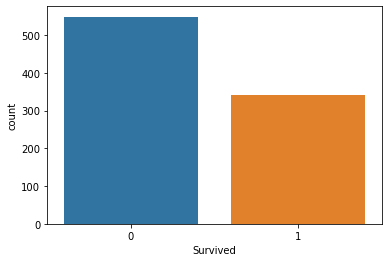

In [7]:
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

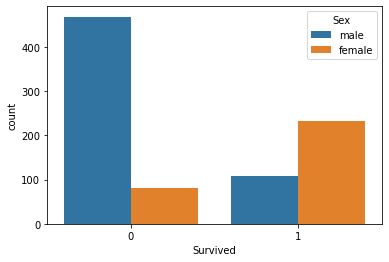

In [8]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

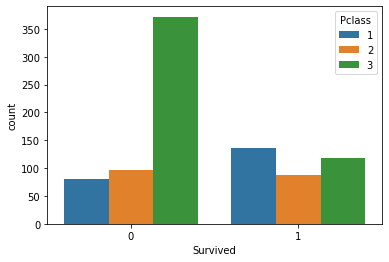

In [9]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

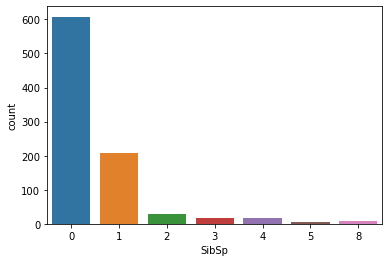

In [10]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

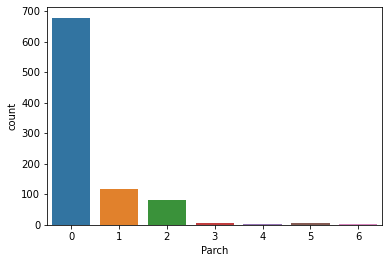

In [11]:
sns.countplot(x="Parch",data=df)

### Data Wrangling

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

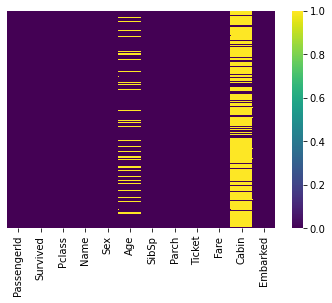

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

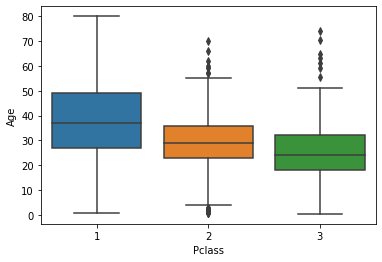

In [14]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [15]:
df.drop("Cabin",axis=1,inplace=True)

In [16]:
df.dropna(inplace=True)

<AxesSubplot:>

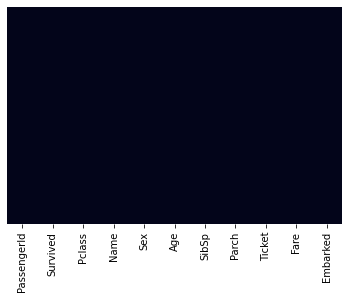

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
Sex=pd.get_dummies(df["Sex"])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [20]:
Sex=pd.get_dummies(df["Sex"],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
embark=pd.get_dummies(df["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
pcl=pd.get_dummies(df["Pclass"],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [24]:
df=pd.concat([df,Sex,embark,pcl],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [25]:
df.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass"],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### Split the Data

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

### Fit the Model

In [29]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
predictions=model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7990654205607477

In [32]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       122
           1       0.81      0.70      0.75        92

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



In [33]:
from sklearn.metrics import confusion_matrix    #Actual(0,1)-rows    Predicted(0,1)-columns
confusion_matrix(y_test,predictions)

array([[107,  15],
       [ 28,  64]], dtype=int64)

<AxesSubplot:>

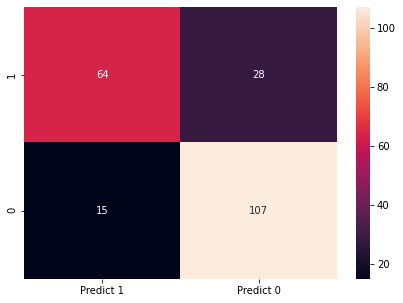

In [34]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [35]:
cm

array([[ 64,  28],
       [ 15, 107]], dtype=int64)

In [36]:
### how good the model is?

# ROC & AUC

In [37]:
from sklearn. metrics import roc_auc_score,auc
from sklearn. metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test) [:, 1])

In [38]:
logit_roc_auc1=roc_auc_score(y_test,model.predict(X_test))
roc_auc = auc(fpr, tpr)

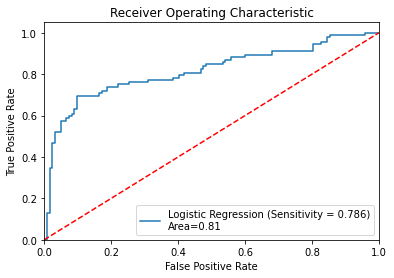

In [39]:
import matplotlib.pyplot as plt
plt.figure( )
plt.plot(fpr, tpr, label= 'Logistic Regression (Sensitivity = %0.3f)' % logit_roc_auc1 + "\nArea=%0.2f" % roc_auc)
plt.plot ([0, 1], [0, 1], 'r--' )
plt.xlim( [0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel( 'False Positive Rate' )
plt.ylabel( 'True Positive Rate' )
plt.title('Receiver Operating Characteristic' )
plt.legend (loc="lower right")
#plt.savefig ( 'Log_ROC')
plt.show( )


In [40]:
predictions_prob = model.predict_proba(X_test) [: , 1]
predictions_prob = predictions_prob.reshape(1, -1)
#predictions_prob


In [41]:
from sklearn.preprocessing import binarize
predictions_class = binarize(predictions_prob, 0.55) [0]
predictions_class=predictions_class.astype(int)
#predictions_class

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.55 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [42]:
confusion_matrix(y_test,predictions_class)

array([[110,  12],
       [ 28,  64]], dtype=int64)

In [43]:
print(metrics.classification_report(y_test, predictions_class))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       122
           1       0.84      0.70      0.76        92

    accuracy                           0.81       214
   macro avg       0.82      0.80      0.80       214
weighted avg       0.82      0.81      0.81       214



In [44]:
logit_roc_auc2=roc_auc_score(y_test,predictions_class)

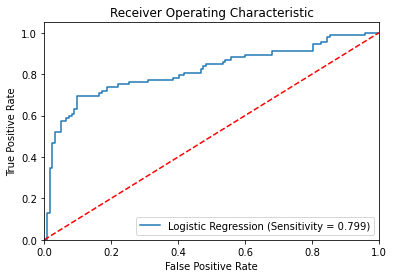

In [45]:
import matplotlib.pyplot as plt
plt.figure( )
plt.plot(fpr, tpr, label= 'Logistic Regression (Sensitivity = %0.3f)' % logit_roc_auc2)
plt.plot ([0, 1], [0, 1], 'r--' )
plt.xlim( [0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel( 'False Positive Rate' )
plt.ylabel( 'True Positive Rate' )
plt.title('Receiver Operating Characteristic' )
plt.legend (loc="lower right")
#plt.savefig ( 'Log_ROC')
plt.show( )
